## **Multi-Class Text Classification for make-up products by using Neural Networks**

In this project, we used Neural Network and Convolutional Neural Netwok to the text classification. In our analysis we used Keras framework. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout, GlobalMaxPool1D, Conv1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import text, sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import utils


In [2]:
df = pd.read_csv('data/drugsComTest_raw.csv', header=0,index_col=0)
df.head()

,drugName,condition,review,rating,date,usefulCount
uniqueID,,,,,,
163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [3]:
df.drop(['date','usefulCount'], axis=1, inplace=True)

In [4]:
df=df.reset_index(drop=True)

In [5]:
df.head()

,drugName,condition,review,rating
0,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10
1,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8
2,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9
3,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9
4,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9


In [6]:
df.tail()

,drugName,condition,review,rating
53761,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10
53762,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9
53763,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8
53764,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1
53765,Arthrotec,Sciatica,"""It works!!!""",9


In [7]:
df.shape

(53766, 4)

# Make data smaller

In [8]:
df = df[df.groupby('drugName')['drugName'].transform('size') > 20]

In [9]:
df = df.head(5000)

In [10]:
df.shape

(5000, 4)

# Preprocessing

In [11]:
print('the review column data types is:',df['review'].dtypes)
df['review'] = df['review'].astype(str)

the review column data types is: object


# Converting to lowerCase

In [12]:
df['review1'] = df['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['review1'].head()

0    "i&#039;ve tried a few antidepressants over th...
1    "my son has crohn&#039;s disease and has done ...
2                        "quick reduction of symptoms"
3    "contrave combines drugs that were used for al...
6    "i&#039;ve had the copper coil for about 3 mon...
Name: review1, dtype: object

# Removing Punctuations

In [13]:
df['review1'] = df['review1'].str.replace('[^\w\s]', '')
df['review1'].head()

C:\Users\Michael\AppData\Local\Temp\ipykernel_12940\2184321559.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review1'] = df['review1'].str.replace('[^\w\s]', '')


0    i039ve tried a few antidepressants over the ye...
1    my son has crohn039s disease and has done very...
2                          quick reduction of symptoms
3    contrave combines drugs that were used for alc...
6    i039ve had the copper coil for about 3 months ...
Name: review1, dtype: object

# Removing StopWords

In [14]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Michael\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
df['review1'] = df['review1'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['review1'].head()

0    i039ve tried antidepressants years citalopram ...
1    son crohn039s disease done well asacol complai...
2                             quick reduction symptoms
3    contrave combines drugs used alcohol smoking o...
6    i039ve copper coil 3 months really excited tho...
Name: review1, dtype: object

# Remove the Rare Words

In [16]:
freq = pd.Series(' '.join(df['review1']).split()).value_counts()
less_freq = list(freq[freq == 1].index)
less_freq

['ez',
 'quothappyquot',
 '272017',
 'orthopedic',
 'workand',
 'easygoing',
 'mopey',
 'schitzoaffective',
 'anymoretook',
 'everysinglepound',
 'anythingwake',
 'greedy',
 'cab',
 'combos',
 'relented',
 'smother',
 'machines',
 'shopping',
 'enlargement',
 '0318',
 'cabinet',
 'norovirus',
 'obstructionconstipation',
 'walgreen039s',
 'daunting',
 'narrowed',
 'awakehave',
 'fanny',
 'charged',
 'radiotheraphy',
 'justification',
 'asapi',
 'releiver',
 'driven',
 'gsk',
 'demon',
 'diziness',
 'nibbles',
 'hoursthe',
 '0317',
 'lnew',
 'depersonlization',
 '090815',
 'gurgle',
 'passengers',
 'femcon',
 '1m',
 'spottedbled',
 'gasx',
 'researchers',
 '4300',
 'embryo',
 'aloha',
 'pimply',
 '111215',
 'positioned',
 'effectscrampingdiarrhea',
 '325',
 'effectshe',
 'organizing',
 'derealization',
 'enjoyso',
 '1011',
 'victory',
 'bang',
 'redish',
 'quotclean',
 'forgo',
 'finest',
 'skinmy',
 'tracker',
 'clamps',
 'effectsmostly',
 'virusfree',
 'quotstickquot',
 'groggydrugged'

Spliting the data into train and test sets:

In [17]:
sentences = df['review1']
y = df['condition']

sentences_train, sentences_test, train_y, test_y = train_test_split(sentences, y, test_size=0.25, random_state=42)

**Word Embeddings**

Word Embedding is a representation of text where words that have the same meaning have a similar representation. It shows words in a coordinate system where related words, based on a corpus of relationships, are placed closer together. In the deep learning frameworks such as  Keras, this part is generally handled by an embedding layer.

In [18]:
tokenize = Tokenizer(num_words=1000)
tokenize.fit_on_texts(sentences_train)

X_train = tokenize.texts_to_sequences(sentences_train)
X_test = tokenize.texts_to_sequences(sentences_test)

vocab_size = len(tokenize.word_index) + 1  

print(sentences_train[2])
print(X_train[2])

quick reduction symptoms
[3, 20, 313, 344, 81, 73, 10, 54, 84, 145]


In [19]:
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

print(X_train[0, :])

[ 55  14 469   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [34]:
from sklearn.preprocessing import OrdinalEncoder

# Create encoder
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value',
                                 unknown_value=-1)

# Fit on training data
ordinal_encoder.fit(train_y.reshape(-1, 1)) #np.array([1,2,3,4,5])

# Transform, notice that 0 and 6 are values that were never seen before
y_train = ordinal_encoder.transform(train_y.reshape(-1, 1)) #np.array([0,1,2,3,4,5,6])
y_test = ordinal_encoder.transform(test_y.values.reshape(-1, 1)) #Y.values.reshape(-1,1)

y_train=y_train.astype(int)

num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes) #num_classes
y_test = utils.to_categorical(y_test, num_classes)

**Building the neural network model**

We built and trained several models to choose best of them. First of them is a simple neural network model.

In [35]:
embedding_dim = 16

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', #categorical_crossentropy
              metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           193744    
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                25616     
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 85        
Total params: 219,445
Trainable params: 219,445
Non-trainable params: 0
_________________________________________________________________


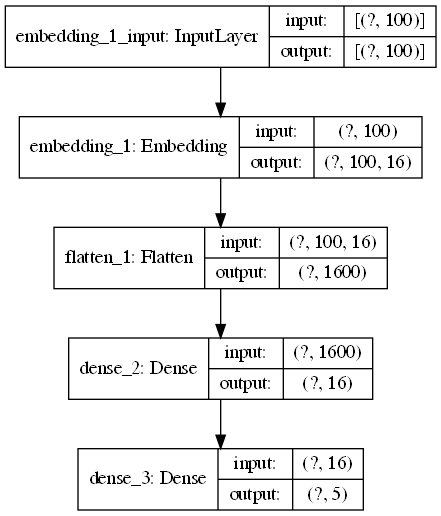

In [36]:
from keras.utils import plot_model
plot_model(model, to_file='model_1.png', show_shapes=True, show_layer_names=True)

In [37]:
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=15,
                    validation_data=(X_test, y_test)) #y_test

Epoch 1/15


InvalidArgumentError:  logits and labels must have the same first dimension, got logits shape [32,5] and labels shape [7296]
	 [[node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at \AppData\Local\Temp\ipykernel_12940\4166743824.py:1) ]] [Op:__inference_train_function_882]

Function call stack:
train_function


In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

In [ ]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

 At the end of the training, we can see that there is a little bit overfitting. 
 
 Now we add dropout layers as a method of regularization.

In [ ]:
model2 = Sequential()
model2.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model2.add(Flatten())
model2.add(Dense(16, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(5, activation='softmax'))

model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model2.summary()

In [ ]:
history_two = model2.fit(X_train, y_train,
                        batch_size=32,
                        epochs=15,
                        validation_data=(X_test, y_test))

In [ ]:
loss, accuracy = model2.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model2.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

In [ ]:
plot_graphs(history_two, "accuracy")
plot_graphs(history_two, "loss")

Another way to work with embeddings is by using a MaxPooling1D/AveragePooling1D or a GlobalMaxPooling1D/GlobalAveragePooling1D layer after the embedding. 

In this case we used GlobalMaxPooling1D which is built-in layer Keras and we can add it to the sequential model:

In [ ]:
embedding_dim = 50

model3 = Sequential()
model3.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model3.add(GlobalMaxPool1D())
model3.add(Dense(16, activation='relu'))
model3.add(Dense(5, activation='softmax'))

model3.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

model3.summary()

In [ ]:
history_3 = model3.fit(X_train, y_train,
                       batch_size=32,
                       epochs=15,
                       validation_data=(X_test, y_test))

In [ ]:
loss, accuracy = model3.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model3.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

In [ ]:
plot_graphs(history_3, "accuracy")
plot_graphs(history_3, "loss")

#### Final Neural Network model

Our final Neural Network consist of an Embedding layer with GlobalMaxPool1D layer, hidden layer using the ReLU activation function. The output layer using the softmax activation function. We also used dropout layers as a method of regularization.
We used the Adam optimizer and categorical cross entropy loss as the loss function.

In [ ]:
embedding_dim = 50

model4 = Sequential()
model4.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model4.add(GlobalMaxPool1D())
model4.add(Dropout(0.2))
model4.add(Dense(16, activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(5, activation='softmax'))

model4.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

model4.summary()

We trained NN model for 15 epoch:

In [ ]:
history_4 = model4.fit(X_train, y_train,
                       batch_size=32,
                       epochs=15,
                       validation_data=(X_test, y_test))

In [ ]:
loss, accuracy = model4.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model4.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

In [ ]:
plot_graphs(history_4, "accuracy")
plot_graphs(history_4, "loss")

**Convolutional Neural Network (CNN)**

A simple CNN architecture: Embedding layer with single layer Convolutional Neural Network (with RELU activation), and the GlobalMaxPool1D layer as well. The hidden layer using the ReLU activation function and an output layer using the softmax activation function. We used the Adam optimizer and categorical cross entropy loss as the loss function.

In [ ]:
embedding_dim = 50

model5 = Sequential()
model5.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model5.add(Conv1D(128, 5, activation='relu'))
model5.add(GlobalMaxPool1D())
model5.add(Dense(10, activation='relu'))
model5.add(Dense(5, activation='softmax'))

model5.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

model5.summary()

We trained CNN model for 5 epoch:

In [ ]:
history_5 = model5.fit(X_train, y_train,
                       batch_size=10,
                       epochs=5,
                       validation_data=(X_test, y_test))

In [ ]:
loss, accuracy = model5.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model5.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

In [ ]:
plot_graphs(history_5, "accuracy")
plot_graphs(history_5, "loss")